In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
%matplotlib inline

# For visualization
import os
import seaborn as sns
from matplotlib import colors
from PIL import Image
from tqdm import tqdm

In [ ]:
# for example the the test train files

annFile = './drive/MyDrive/damage_detection/CarDD_release/CarDD_COCO/annotations/instances_train2017.json'
img_dir = './drive/MyDrive/damage_detection/CarDD_release/CarDD_COCO/train2017'
coco=COCO(annFile)

loading annotations into memory...
Done (t=2.46s)
creating index...
index created!


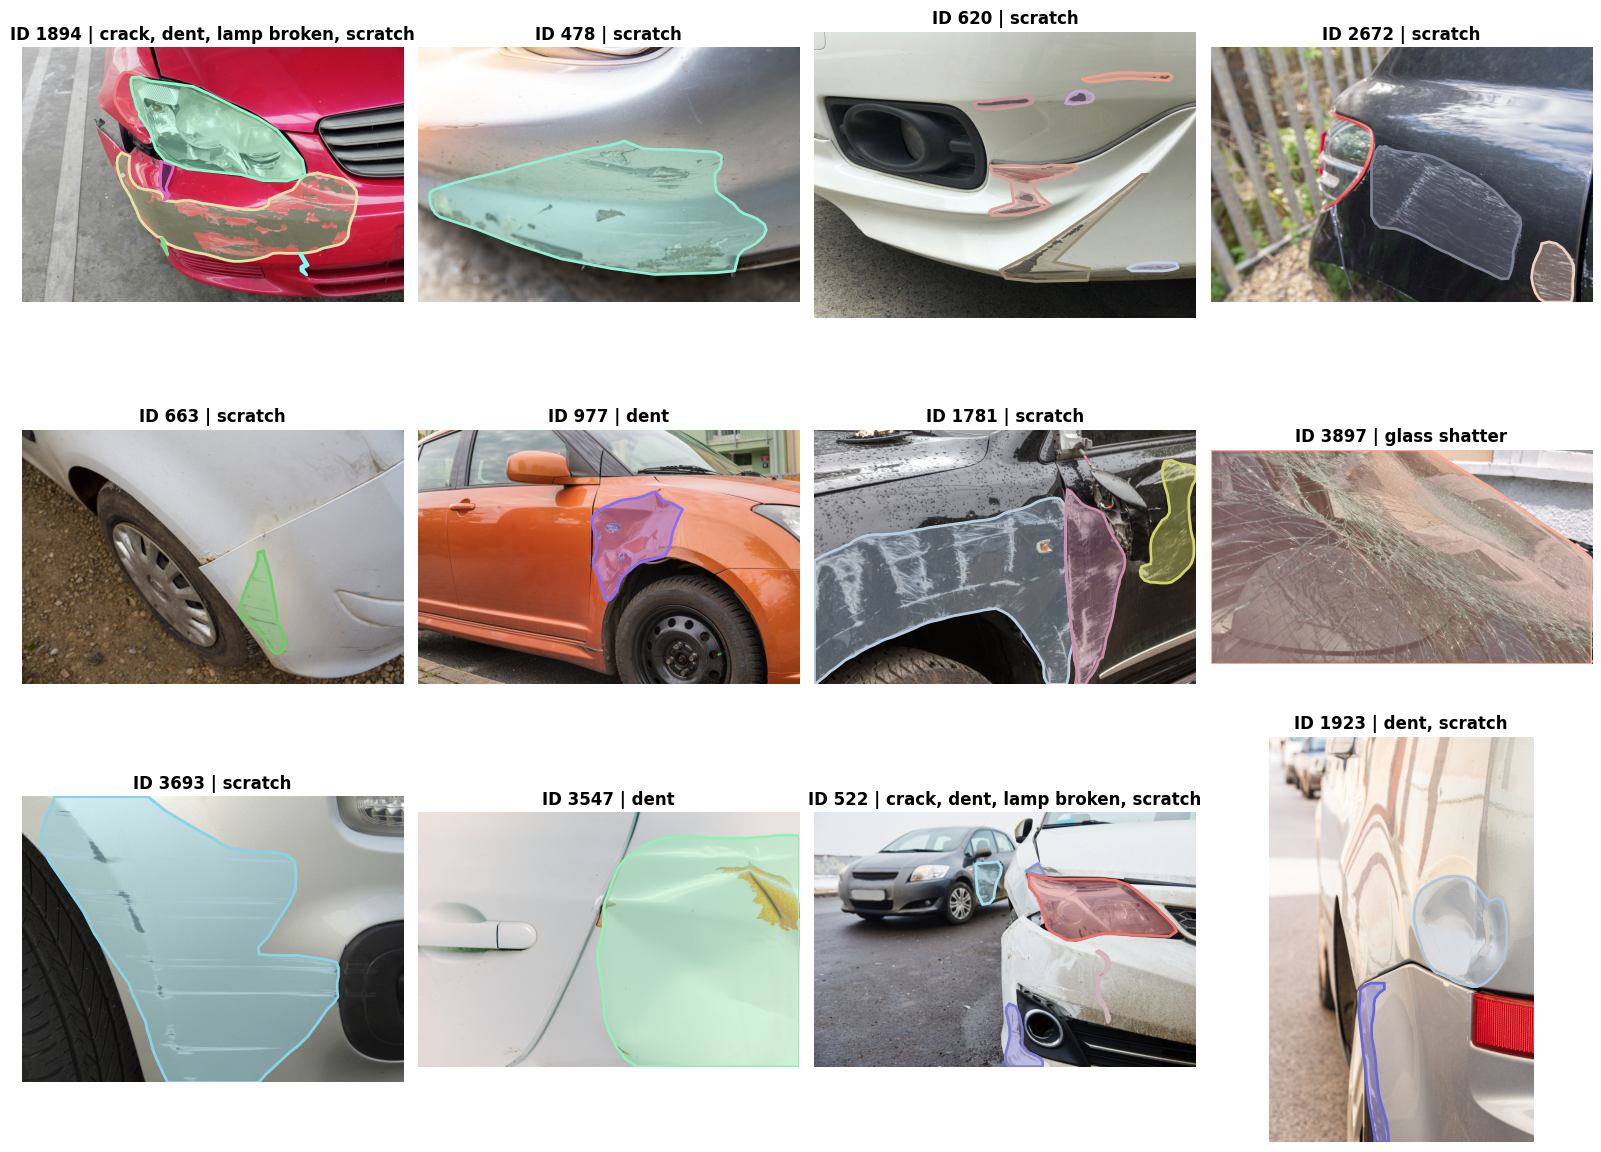

In [ ]:
import random
import os
import matplotlib.pyplot as plt
from skimage import io

cols, rows = 4, 3


# Get all image IDs that have at least one annotation
imgIds_with_anns = []
for iid in coco.getImgIds():
    if coco.getAnnIds(imgIds=[iid], iscrowd=None):
        imgIds_with_anns.append(iid)

# Get images
num_images = 4 * 3
picked_imgIds = random.sample(imgIds_with_anns, min(num_images, len(imgIds_with_anns)))

# Plot
fig = plt.figure(figsize=(cols * 4, rows * 4))
for i, img_id in enumerate(picked_imgIds, start=1):
    img_info = coco.loadImgs([img_id])[0]
    img_path = os.path.join(img_dir, img_info["file_name"])
    I = io.imread(img_path)

    annIds = coco.getAnnIds(imgIds=[img_id], iscrowd=None)
    anns = coco.loadAnns(annIds)

    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(I)
    ax.axis('off')

    # segmentation masks, no bounding boxes
    plt.sca(ax)
    coco.showAnns(anns, draw_bbox=False)

    # Create title with damage types
    damages = [category_map.get(a["category_id"], str(a["category_id"])) for a in anns]
    title_txt = f"ID {img_info.get('id', img_id)} | {', '.join(sorted(set(damages)))}"
    ax.set_title(title_txt, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()
